#Importando Bibliotecas

In [ ]:
import pandas as pd

#importando o arquivo e definir com caminho do arquivo
arquivo = 'http://www.harve.com.br/praticas/dados_etl.csv' # Corrected URL and extension
#carregar um df do pandas com comando read.csv
df = pd.read_csv(arquivo, sep = '\t')
df.head()

,Client ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#Verificando e Conhecendo o Arquivo


In [ ]:

print(df.shape) #formato do arquivo(linhas, colunas )
print(df.info()) #colunas e tipos de dados
print(df.head()) #primeiras 5 linhas
print(df.describe()) #estatistica descritiva

(2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Client ID            2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 n

#Criando Colunas e Fazendo Calculos

In [ ]:
#calcular idade total de filhos e quantidade de intens vendidos
df['Age'] = 2025 - df['Year_Birth']
#df.head()

#criar data frame somente com clientes acima de 50 anos
df_50 = df[df['Age'] > 50]
df_50.head()
#

,Client ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,58
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,0,0,0,0,0,0,3,11,0,56
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,0,0,0,0,0,0,3,11,0,52


#Calcular Idade Total de Filhos e Quantidade de Intens Vendidos

In [ ]:
df['Age'] = 2025 - df['Year_Birth']
df.head()


,Client ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,total_childream,total_purchases,total_items
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,68,0,25,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,71,2,6,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,60,0,21,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,41,1,8,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,44,1,19,422


# No dataframe de clientes, crie uma coluna que represente a quantidade de filhos total, independente de ser criança ou adolescente

In [ ]:
df['total_childream'] = df['Kidhome'] + df['Teenhome']
df['total_purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['total_items'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()

#Funções Extras  

In [ ]:
#função que tras o volume de registro
print(df['Education'].value_counts())

#Outra forma de verificar os valores únicos de uma coluna
print(df['Education'].unique())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


#Criar Mapeamento de Nivel Educacional (basic, 2nCycle, Graduation, Master, Phd)

In [ ]:
print(df['Education'].value_counts())
ensino_dict = {
    'Basic': 'Low',
    '2n Cycle': 'Low',
    'Graduation': 'Medium',
    'Master': 'High',
    'PhD': 'High'
}

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


# Adicionando Colunas para Categorizar os DADOS

In [ ]:
#primeiro modo
df['Class_Education'] = df['Education'].apply(lambda x: ensino_dict[x])
#segundo modo
df['Class_Education_2'] = df['Education'].map(ensino_dict)
df.head()

,Client ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,total_childream,total_purchases,total_items,Class_income,Class_Education,Class_Education_2
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,3,11,1,68,0,25,1617,High,Medium,Medium
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,3,11,0,71,2,6,27,High,Medium,Medium
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,3,11,0,60,0,21,776,Very high,Medium,Medium
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,3,11,0,41,1,8,53,Medium,Medium,Medium
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,11,0,44,1,19,422,High,High,High


# Criar mapeamento para renda dos clientes (20k = low, 60k = medium, very high)

In [ ]:
#criar mapeamento para renda dos clientes (20k = low, 60k = medium, very high)
def Class_income(income):
  if income <= 20000:
    return 'Low'
  elif income <= 40000:
    return 'Medium'
  elif income <= 60000:
    return 'High'
  else:
    return 'Very high'

#adicionar a coluna para classificar a renda
df['Class_income'] = df['Income'].apply(lambda x: Class_income(x))


 # Crie uma coluna para categorizar os passageiros do titanic conforme a sua idade.
Depois faça a contagem de cada
categoria através do value_counts:
Até 10 anos - Criança
Até 20 anos - Joven
Até 60 anos - Adulto
Mais de 60 anos - Idoso

In [ ]:
#Importa bibliotecas necessarias
#criar varaiavel com caminho do arquivo
#criar data frame com arquivo

In [ ]:
import pandas as pd

#criar varaiavel com caminho do arquivo
arquivo_barco = 'https://www.harve.com.br/praticas/titanic-pt-BR.csv'
#criar data frame com arquivo
dfBarco = pd.read_csv(arquivo_barco)


def classifica_idade(age):
    if age <= 10:
        return 'Criança'
    elif age <= 20:
        return 'Jovem'
    elif age <= 60:
        return 'Adulto'
    else:
        return 'Idoso'

dfBarco['Age_Category'] = dfBarco['Idade'].apply(lambda x: classifica_idade(x))

# Contagem de cada categoria de idade
print(dfBarco['Age_Category'].value_counts())
dfBarco.head()


Age_Category
Adulto     513
Idoso      199
Jovem      115
Criança     64
Name: count, dtype: int64


,Id do passageiro,Sobrevivente,Classe,Nome,Sexo,Idade,Irmaos ou conjuge,Pais ou filhos,Ticket,Tarifa do passageiro,Cabine,Local de embarque,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",masculino,22.0,1,0,A/5 21171,7.25,NaN,Southampton,Adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",feminino,38.0,1,0,PC 17599,712.833,C85,Cherbourg,Adulto
2,3,1,3,"Heikkinen, Miss. Laina",feminino,26.0,0,0,STON/O2. 3101282,7.925,NaN,Southampton,Adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",feminino,35.0,1,0,113803,53.1,C123,Southampton,Adulto
4,5,0,3,"Allen, Mr. William Henry",masculino,35.0,0,0,373450,08.05,NaN,Southampton,Adulto


#Funções Rápidas como copy, nulos, excluindo  nulos

In [ ]:
#verificando quantidade de nulos
df.isna().sum()
#criar df copias para excluir valores nulos
df2 = df.copy()
#excluir entradas com valores nulos
df2 = df2.dropna()
#substituir os nas por media
df['Income'] = df['Income'].fillna(df['Income'].mean()) #median() -> substituir toda a media
print(df.isna().sum())

#Descubra os registros que estão sem local de embarque entre os passageiros do titanic e exclua eles

In [ ]:
dfBarco.isna().sum()
dfBarco2 = dfBarco.copy()
dfBarco2 = dfBarco.dropna(subset=['Local de embarque'])
print(dfBarco2.isna().sum())

Id do passageiro          0
Sobrevivente              0
Classe                    0
Nome                      0
Sexo                      0
Idade                   177
Irmaos ou conjuge         0
Pais ou filhos            0
Ticket                    0
Tarifa do passageiro      0
Cabine                  687
Local de embarque         0
Age_Category              0
dtype: int64


In [ ]:
#Preencha os registros com idade nula com a média de idade dos passageiros
dfBarco['Idade'] = dfBarco['Idade'].fillna(dfBarco['Idade']).mean()
dfBarco.isna().sum()

,0
Id do passageiro,0
Sobrevivente,0
Classe,0
Nome,0
Sexo,0
Idade,0
Irmaos ou conjuge,0
Pais ou filhos,0
Ticket,0
Tarifa do passageiro,0


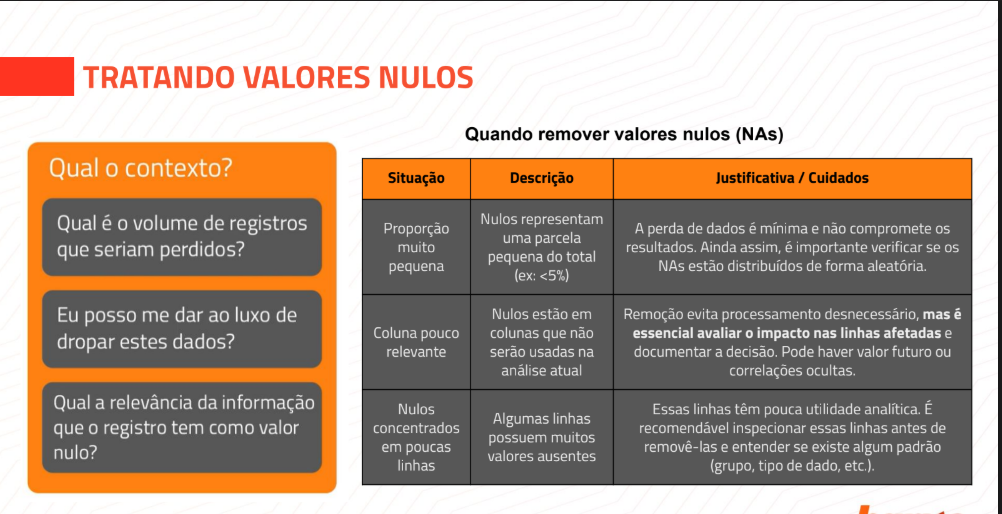